In [2]:
!pip install --upgrade xlrd
!pip install geopandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 10.9 MB/s eta 0:00:00


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/home/onyxia/work/Maps_cultural_life_Paris/Outputs/DataSets/DataTheatre_base_finale.csv', sep=';')

In [5]:
# We are looking for the number of plays per quarter

In [6]:
result_df = df.groupby('commune')['etablissement'].count().reset_index()

result_df = result_df.rename(columns={'etablissement': 'nombre_de_pieces'})

print(result_df)

      commune  nombre_de_pieces
0   Paris 10e                52
1   Paris 11e                49
2   Paris 12e                38
3   Paris 13e                14
4   Paris 14e                31
5   Paris 15e                26
6   Paris 16e                13
7   Paris 17e                13
8   Paris 18e                79
9   Paris 19e                37
10  Paris 1er                10
11  Paris 20e                19
12   Paris 2e                18
13   Paris 3e                 4
14   Paris 4e                46
15   Paris 5e                25
16   Paris 6e                29
17   Paris 7e                 1
18   Paris 8e                37
19   Paris 9e                44


In [7]:
result_df['arrondissement'] = result_df['commune'].str.extract('(\d+)', expand=False).astype(int)

df_classe = result_df.sort_values(by='arrondissement')

print(df_classe)

      commune  nombre_de_pieces  arrondissement
10  Paris 1er                10               1
12   Paris 2e                18               2
13   Paris 3e                 4               3
14   Paris 4e                46               4
15   Paris 5e                25               5
16   Paris 6e                29               6
17   Paris 7e                 1               7
18   Paris 8e                37               8
19   Paris 9e                44               9
0   Paris 10e                52              10
1   Paris 11e                49              11
2   Paris 12e                38              12
3   Paris 13e                14              13
4   Paris 14e                31              14
5   Paris 15e                26              15
6   Paris 16e                13              16
7   Paris 17e                13              17
8   Paris 18e                79              18
9   Paris 19e                37              19
11  Paris 20e                19         

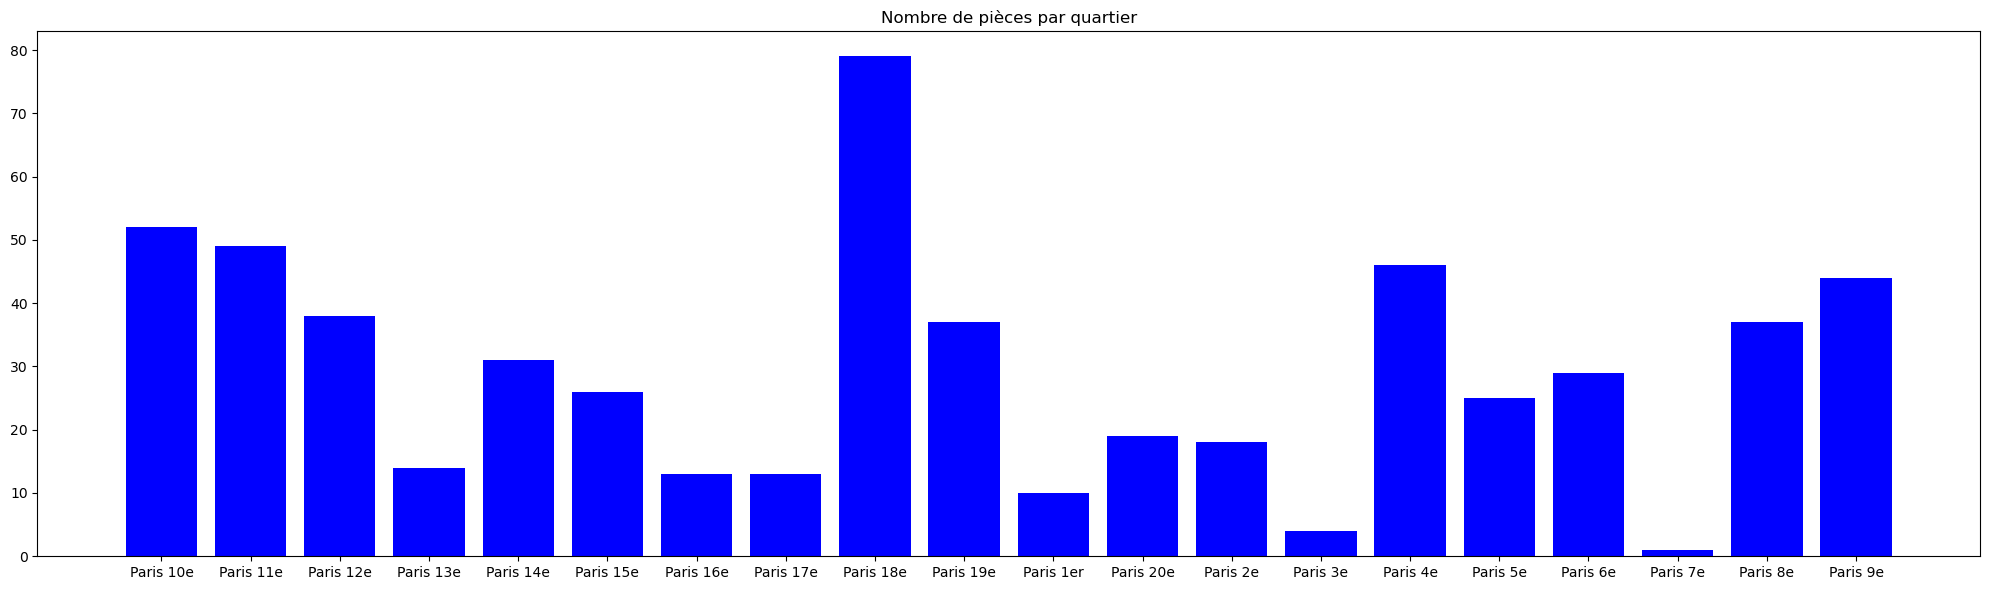

In [8]:
fig, ax = plt.subplots(figsize=(20, max(6, len(result_df) * 0.3)))
ax.bar(result_df['commune'], result_df['nombre_de_pieces'], color='blue')
ax.set_title('Nombre de pièces par quartier')
plt.tight_layout()
plt.show()

In [9]:
# We are looking for the number of plays per theatre

In [10]:
df_pieces_par_etablissement = df.groupby('etablissement')['nom'].count().reset_index()
df_pieces_par_etablissement = df_pieces_par_etablissement.rename(columns={'nom': 'nombre_de_pieces'})

In [11]:
print(df_pieces_par_etablissement)

                        etablissement  nombre_de_pieces
0                            Alhambra                 2
1                      Apollo Théâtre                 1
2                    Artistic Théâtre                 1
3        Athénée Théâtre Louis-Jouvet                 3
4                    Au Port du Salut                 1
..                                ...               ...
120             Théâtre du Rond-Point                15
121  Théâtre du Soleil - Cartoucherie                 3
122               Théâtre Édouard VII                 2
123                À la Folie Théâtre                 5
124             Église Saint-Augustin                 1

[125 rows x 2 columns]


In [17]:
# We are looking for the mean price per quarter

In [23]:
df['prix moyen'] = df['prix moyen'].astype(str)

df['prix moyen'] = pd.to_numeric(df['prix moyen'].str.extract('(\d+)')[0], errors='coerce')

df['prix moyen'] = df['prix moyen'].round(1)

df_prix_moyen = df.groupby('commune')['prix moyen'].mean().reset_index()

print(df_prix_moyen)

      commune  prix moyen
0   Paris 10e   30.920000
1   Paris 11e   23.717391
2   Paris 12e   17.631579
3   Paris 13e   29.000000
4   Paris 14e   25.964286
5   Paris 15e   22.333333
6   Paris 16e   27.250000
7   Paris 17e   27.400000
8   Paris 18e   21.913043
9   Paris 19e   16.107143
10  Paris 1er   55.000000
11  Paris 20e   19.388889
12   Paris 2e   31.647059
13   Paris 3e   32.000000
14   Paris 4e   24.547619
15   Paris 5e   24.708333
16   Paris 6e   26.826087
17   Paris 7e   27.000000
18   Paris 8e   34.121212
19   Paris 9e   30.470588


In [24]:
df_prix_moyen['arrondissement'] = df_prix_moyen['commune'].str.extract('(\d+)', expand=False).astype(int)

df_ordonne = df_prix_moyen.sort_values(by='arrondissement')

print(df_ordonne)

      commune  prix moyen  arrondissement
10  Paris 1er   55.000000               1
12   Paris 2e   31.647059               2
13   Paris 3e   32.000000               3
14   Paris 4e   24.547619               4
15   Paris 5e   24.708333               5
16   Paris 6e   26.826087               6
17   Paris 7e   27.000000               7
18   Paris 8e   34.121212               8
19   Paris 9e   30.470588               9
0   Paris 10e   30.920000              10
1   Paris 11e   23.717391              11
2   Paris 12e   17.631579              12
3   Paris 13e   29.000000              13
4   Paris 14e   25.964286              14
5   Paris 15e   22.333333              15
6   Paris 16e   27.250000              16
7   Paris 17e   27.400000              17
8   Paris 18e   21.913043              18
9   Paris 19e   16.107143              19
11  Paris 20e   19.388889              20


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [26]:
# We will have a closer look at Paris's district to test if their level of wealth has a significant impact on the price of theatre's tickets

In [27]:
# We use the price of the square meter in each quarter to approximate the wealth level

In [28]:
!pip install -q lxml

import bs4
import lxml
import pandas as pd
import urllib
from bs4 import BeautifulSoup
from urllib import request

In [29]:
url = 'https://www.journaldunet.com/patrimoine/prix-immobilier/paris/ville-75056'
request_text = request.urlopen(url).read()
page = bs4.BeautifulSoup(request_text, 'html.parser')

In [30]:
rows = page.find_all('tr')
informations = []

for row in rows:
    link = row.find('a')
    columns = row.find_all('td')
    if link and len(columns) > 1:
        arrondissement = link.text.strip()
        prix = columns[1].text.strip()
        informations.append({'arrondissement': arrondissement, 'prix': prix})

df2 = pd.DataFrame(informations)

df2['prix'] = df2['prix'].str.replace('\D', '', regex=True).astype(int) #removes all the non-numerical (but keeps the 2 of the m2) 
df2['prix'] = df2['prix'].astype(str).str[:-1].astype(int) #removes the last figure of our number (here the 2 from 'm2')


In [31]:
df2.to_csv('Prixm2.csv', index = False)

In [32]:
#Regression of the price of the ticket on the price of the square meter

In [33]:
X=df2['prix']
y = df_ordonne['prix moyen']

In [34]:
import numpy as np

In [35]:
X = X.values.reshape(-1, 1)

In [36]:
model = LinearRegression()
model.fit(X,y)
y_pred = model.predict(X)

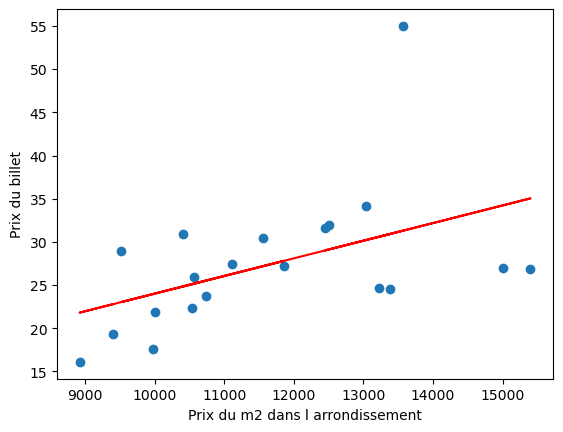

In [37]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=1.5)
plt.xlabel('Prix du m2 dans l arrondissement')
plt.ylabel('Prix du billet')
plt.show()

In [38]:
# We have a closer look at the link between the number of estblishments in a quarter and the price of the ticket

In [39]:
A = df_classe['nombre_de_pieces']
b = df_ordonne['prix moyen']
A= A.values.reshape(-1, 1)

In [40]:
model.fit(A,b)
b_pred = model.predict(A)

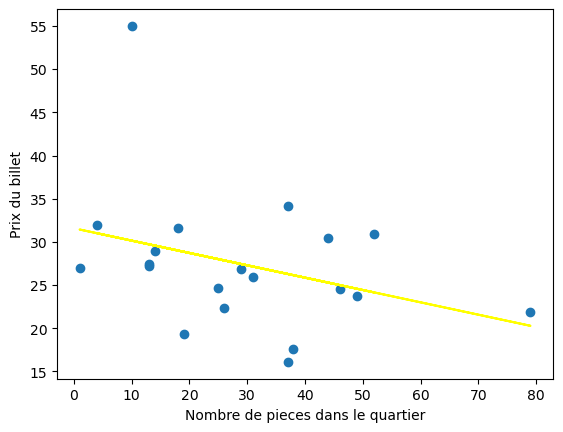

In [41]:
plt.scatter(A, b)
plt.plot(A, b_pred, color='yellow', linewidth=1.5)
plt.xlabel('Nombre de pieces dans le quartier')
plt.ylabel('Prix du billet')
plt.show()